

# Week 13: Forecasting 


![VAR](https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-94-017-8642-3_2/MediaObjects/316588_1_En_2_Fig14_HTML.gif)




### Instructions for Submitting

Please follow the format below when typing your names in the notebook. This is **mandatory** for all group submissions.
**Each group** will turn in a notebook. Note that this is different from the first ICA. You will still work together, but you will come up with your own answers.

- Each member's name must be written in the format:  
  **Last Name, First Name, Second Name**
- Separate each member's name with a **semicolon (;)**
- Do **not** include any extra text or formatting.
- **Delete this instruction text** and replace it with your names.

#### Example:
    Doe, Jane Marie; Smith, John Alan; Lee, Anna Grace;

⚠️ **Failure to follow this format will result in a reduction of your grade.**

Put your names in the next markdown cell




_Names_

## Learning Objectives

By the end of this assignment, you will be able to:
1. Derive and implement autoregressive models using linear algebra
2. Test for stationarity and interpret results
3. Extend univariate AR to multivariate VAR frameworks
4. Design and interpret Granger causality tests
5. Apply ARIMA modeling to real-world data
6. Connect theoretical frameworks to practical implementation

---

## Group Roles

Assign these roles at the start:
- **Project Coordinator**: Keeps group on track, ensures everyone participates
- **Timekeeper**: Monitors time allocations, gives 2-minute warnings
- **Lead Coder**: Manages screen sharing, but everyone codes
- **Documentation Lead**: Ensures photos are taken, notes are recorded

---

## Part 1: AR(p) - From Theory to Equations (20 minutes)

### Whiteboard Work

**Objective**: Derive the complete mathematical framework for fitting AR(p) models.

Working at your whiteboard, complete these steps:

#### Step 1.1: Write the Model (3 minutes)

Start with a time series $\{y_1, y_2, ..., y_T\}$.

**Write out**:
1. The AR(p) model equation
2. What you're estimating (parameters)
3. What observations you can actually use for estimation (careful with first p values!)

**Key question**: If you have T = 100 observations and fit AR(3), how many observations can you use?


#### Step 1.2: Transform to Linear Algebra (7 minutes)

Express as a regression problem: $\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}$

**Write out explicitly** (use actual numbers for a concrete example):
- For AR(2) with T = 10 observations
- Show the response vector $\mathbf{y}$ (dimensions?)
- Show the design matrix $\mathbf{X}$ (write out at least first 3 rows)
- Show the parameter vector $\boldsymbol{\beta}$

**Verify**: What are the dimensions of each matrix?

#### Step 1.3: Solve for Parameters (5 minutes)

**Write out**:
1. Normal equations: $\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} = \mathbf{X}^T\mathbf{y}$
2. Closed-form solution: $\hat{\boldsymbol{\beta}} = ?$

**Connection to linear algebra**: What is $(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$ called?

#### Step 1.4: Forecasting (5 minutes)

Once you have $\hat{\boldsymbol{\beta}} = [\hat{c}, \hat{\phi}_1, ..., \hat{\phi}_p]^T$:

**Write out**:
1. **One-step ahead forecast**: $\hat{y}_{T+1} = ?$
2. **Two-step ahead forecast**: $\hat{y}_{T+2} = ?$ (careful - what do you use for $y_{T+1}$?)
3. **Multi-step iteration**: How do you continue to $\hat{y}_{T+3}, \hat{y}_{T+4}, ...$?

**Critical question**: Why does forecast uncertainty grow with horizon?

**📸 Take photo of whiteboard (Photo 1)**



---

## Part 2: Stationarity Testing (15 minutes)

### Understanding the Data

You have two datasets:
- **Temperature** (°F): Monthly average temperatures, 2000-2009
- **Precipitation** (inches): Monthly average precipitation, 2000-2009

**Dataset assignment**:
- **Even groups** (2, 4, 6, ...): Temperature
- **Odd groups** (1, 3, 5, ...): Precipitation

### Task 2.1: Visual Inspection (5 minutes)



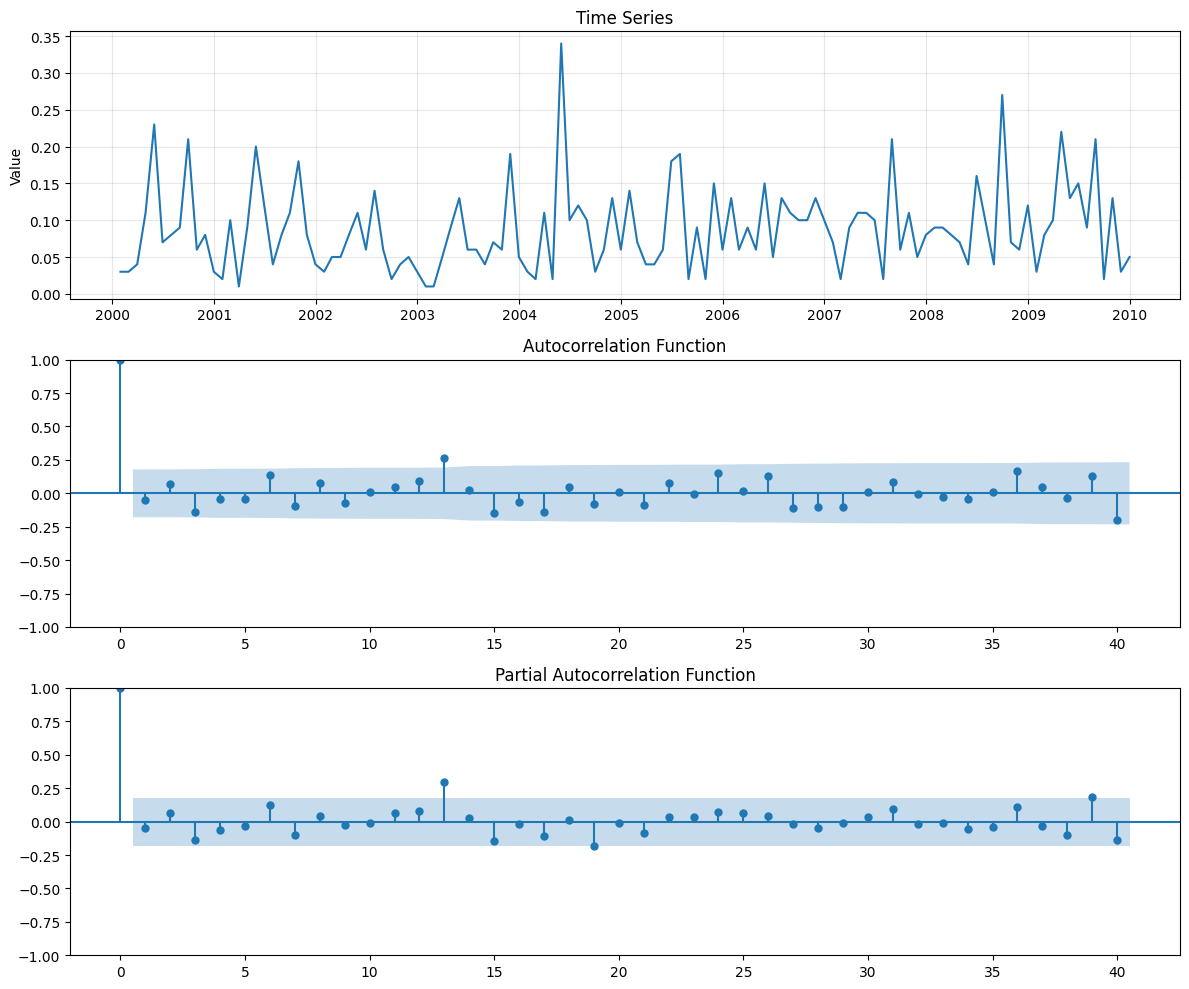

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Data (included at end of assignment)
# ... load your assigned dataset as 'data' ...

temperature_data = [
    [20.6, 29.8, 41.0, 44.2, 59.2, 66.1, 66.7, 68.2, 60.1, 53.0, 37.7, 15.6], # 2000
    [24.7, 26.5, 31.9, 48.9, 59.2, 66.3, 69.7, 70.8, 58.7, 49.9, 46.4, 34.2], # 2001
    [30.7, 29.7, 31.5, 47.2, 51.8, 68.6, 73.2, 69.3, 64.6, 46.4, 36.4, 26.8], # 2002
    [17.6, 19.9, 32.3, 45.3, 53.8, 63.5, 69.0, 69.7, 60.8, 48.2, 41.2, 30.7], # 2003
    [16.5, 23.3, 38.8, 48.2, 58.2, 65.0, 68.9, 65.1, 64.7, 51.3, 40.4, 28.2], # 2004
    [21.8, 28.2, 30.8, 50.2, 54.7, 72.7, 72.8, 72.8, 66.8, 52.6, 41.8, 25.6], # 2005
    [33.2, 25.4, 35.7, 50.3, 58.2, 66.6, 73.7, 69.8, 59.1, 46.4, 40.9, 34.8], # 2006
    [26.4, 17.2, 39.4, 44.6, 60.5, 68.9, 70.3, 71.4, 64.5, 56.4, 37.6, 27.2], # 2007
    [26.3, 21.5, 31.9, 50.2, 54.7, 68.1, 71.0, 69.0, 63.4, 48.4, 37.6, 25.5], # 2008
    [15.7, 26.9, 36.8, 46.7, 57.2, 66.0, 66.6, 68.2, 62.2, 47.6, 43.3, 27.3], # 2009
]

precipitation_data = [
    [0.03, 0.03, 0.04, 0.11, 0.23, 0.07, 0.08, 0.09, 0.21, 0.06, 0.08, 0.03], # 2000
    [0.02, 0.10, 0.01, 0.09, 0.20, 0.12, 0.04, 0.08, 0.11, 0.18, 0.08, 0.04], # 2001
    [0.03, 0.05, 0.05, 0.08, 0.11, 0.06, 0.14, 0.06, 0.02, 0.04, 0.05, 0.03], # 2002
    [0.01, 0.01, 0.05, 0.09, 0.13, 0.06, 0.06, 0.04, 0.07, 0.06, 0.19, 0.05], # 2003
    [0.03, 0.02, 0.11, 0.02, 0.34, 0.10, 0.12, 0.10, 0.03, 0.06, 0.13, 0.06], # 2004
    [0.14, 0.07, 0.04, 0.04, 0.06, 0.18, 0.19, 0.02, 0.09, 0.02, 0.15, 0.06], # 2005
    [0.13, 0.06, 0.09, 0.06, 0.15, 0.05, 0.13, 0.11, 0.10, 0.10, 0.13, 0.10], # 2006
    [0.07, 0.02, 0.09, 0.11, 0.11, 0.10, 0.02, 0.21, 0.06, 0.11, 0.05, 0.08], # 2007
    [0.09, 0.09, 0.08, 0.07, 0.04, 0.16, 0.10, 0.04, 0.27, 0.07, 0.06, 0.12], # 2008
    [0.03, 0.08, 0.10, 0.22, 0.13, 0.15, 0.09, 0.21, 0.02, 0.13, 0.03, 0.05], # 2009
]

# Convert to flat arrays
temperature = np.array(temperature_data).flatten()
precipitation = np.array(precipitation_data).flatten()

# Choose one dataset to work with (temperature or precipitation)
data = precipitation  # Change to precipitation for odd groups

dates = pd.date_range(start="2000-01", periods=len(data), freq="ME")
data = pd.Series(data, index=dates)  # Convert to Series for decomposition

# Plot the series
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Time series plot
axes[0].plot(data.index, data.values)
axes[0].set_title('Time Series')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)

# ACF
plot_acf(data, lags=40, ax=axes[1], alpha=0.05)
axes[1].set_title('Autocorrelation Function')

# PACF  
plot_pacf(data, lags=40, ax=axes[2], alpha=0.05)
axes[2].set_title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


**Group discussion**:
- Does the series show a clear trend? yes, sinusoidal
- Is there obvious seasonality? What period? yes, ~1.5 years
- Does ACF decay slowly (suggests non-stationarity)? no, it increases.
- What does PACF suggest for AR order p? looks about ~6

### Task 2.2: Formal Testing (10 minutes)

#### Stationarity Testing: ADF and KPSS

The Augmented Dickey-Fuller (ADF) and Kwiatkowski-Phillips-Schmidt-Shin (KPSS) tests are complementary statistical tools for assessing whether a time series is stationary—a critical assumption for many time series models. The ADF test approaches the question from a position of skepticism about stationarity: its null hypothesis assumes the series contains a unit root (is non-stationary), and it requires strong evidence to conclude the series is stationary. Specifically, the ADF test examines whether the coefficient on the lagged level of the series is significantly less than one by regressing the first difference of the series on its lagged level and lagged differences. A very negative test statistic (or small p-value, typically < 0.05) allows us to reject the null hypothesis and conclude the series is stationary. In contrast, the KPSS test inverts this logic: it assumes stationarity as the null hypothesis and requires evidence to conclude non-stationarity. The KPSS test decomposes the series into a deterministic trend, a random walk component, and stationary error, then tests whether the variance of the random walk component is zero. A large test statistic (or small p-value < 0.05) leads to rejecting stationarity. This philosophical difference is crucial—the ADF test asks "can we prove it's stationary?" while KPSS asks "can we prove it's non-stationary?"

In practice, these tests are most powerful when used together in a confirmatory framework. When both tests agree—ADF rejecting the unit root (p < 0.05) and KPSS failing to reject stationarity (p > 0.05)—we have strong evidence for stationarity and can proceed with AR or ARMA models without differencing. When both suggest non-stationarity, differencing is clearly needed, pointing toward ARIMA models with d ≥ 1. However, conflicting results (where tests disagree) signal potential complications such as structural breaks in the data, "near unit root" behavior where the series is highly persistent but technically stationary, or misspecification of the deterministic components (constant vs. trend). In such ambiguous cases, researchers should investigate further through visual inspection, testing for structural breaks, or examining subperiods of the data. For financial returns like cryptocurrency data, we typically expect both tests to confirm stationarity, since returns represent the first difference of prices (which themselves usually contain unit roots). The key insight is that these tests complement rather than replace each other: using both provides a more robust assessment than relying on either alone, particularly given that both can be affected by sample size, the choice of lag length or bandwidth, and the presence of structural changes in the data.



In [8]:
def comprehensive_stationarity_test(series, name='Series'):
    """Run ADF and KPSS tests with interpretation"""
    print(f"\n{'='*60}")
    print(f"Stationarity Tests for {name}")
    print(f"{'='*60}")
    
    # ADF Test (H0: unit root / non-stationary)
    adf_result = adfuller(series, autolag='AIC')
    print(f"\nADF Test (H0: Non-stationary)")
    print(f"  Test Statistic: {adf_result[0]:.4f}")
    print(f"  p-value: {adf_result[1]:.4f}")
    print(f"  Lags used: {adf_result[2]}")
    
    if adf_result[1] < 0.05:
        adf_conclusion = "STATIONARY"
        print(f"  ✓ Reject H0: Evidence for stationarity")
    else:
        adf_conclusion = "NON-STATIONARY"
        print(f"  ✗ Fail to reject H0: Evidence for unit root")
    
    # KPSS Test (H0: stationary)
    kpss_result = kpss(series, regression='c', nlags='auto')
    print(f"\nKPSS Test (H0: Stationary)")
    print(f"  Test Statistic: {kpss_result[0]:.4f}")
    print(f"  p-value: {kpss_result[1]:.4f}")
    print(f"  Lags used: {kpss_result[2]}")
    
    if kpss_result[1] > 0.05:
        kpss_conclusion = "STATIONARY"
        print(f"  ✓ Fail to reject H0: Evidence for stationarity")
    else:
        kpss_conclusion = "NON-STATIONARY"
        print(f"  ✗ Reject H0: Evidence for non-stationarity")
    
    # Combined interpretation
    print(f"\n{'='*60}")
    print("COMBINED INTERPRETATION")
    print(f"{'='*60}")
    
    if adf_conclusion == "STATIONARY" and kpss_conclusion == "STATIONARY":
        print("✓✓ Both tests agree: Series is STATIONARY")
        print("   → Use AR(p) model without differencing")
        recommendation = "stationary"
    elif adf_conclusion == "NON-STATIONARY" and kpss_conclusion == "NON-STATIONARY":
        print("✓✓ Both tests agree: Series is NON-STATIONARY")
        print("   → Difference the series, or use ARIMA(p,1,q)")
        recommendation = "non-stationary"
    else:
        print("⚠⚠ Tests DISAGREE - investigate further")
        print("   Possible causes:")
        print("   - Structural breaks in the data")
        print("   - Near unit root (highly persistent but stationary)")
        print("   - Small sample size")
        print("   → Check for breaks, try differencing and retest")
        recommendation = "ambiguous"
    
    return {
        'adf_statistic': adf_result[0],
        'adf_pvalue': adf_result[1],
        'kpss_statistic': kpss_result[0],
        'kpss_pvalue': kpss_result[1],
        'recommendation': recommendation
    }

# Test original series
results = comprehensive_stationarity_test(data, 'Original Series')

# If non-stationary, test first difference
if results['recommendation'] in ['non-stationary', 'ambiguous']:
    data_diff = data.diff().dropna()
    results_diff = comprehensive_stationarity_test(data_diff, 'First Difference')




Stationarity Tests for Original Series

ADF Test (H0: Non-stationary)
  Test Statistic: -11.3939
  p-value: 0.0000
  Lags used: 0
  ✓ Reject H0: Evidence for stationarity

KPSS Test (H0: Stationary)
  Test Statistic: 0.3010
  p-value: 0.1000
  Lags used: 1
  ✓ Fail to reject H0: Evidence for stationarity

COMBINED INTERPRETATION
✓✓ Both tests agree: Series is STATIONARY
   → Use AR(p) model without differencing


/tmp/ipykernel_4546/2755574109.py:22: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags='auto')


**Record in notebook**:
1. ADF and KPSS test statistics and p-values. see output.
2. Do tests agree or disagree? see output.
3. Is differencing needed? see output.
4. What does this mean for modeling choice? see output.



---

## Part 3: Implementation - AR(p) Model (20 minutes)

### Task 3.1: Manual Implementation (15 minutes)

Implement AR(p) using the linear algebra framework from your whiteboard:



In [ ]:
def fit_ar_manual(data, p):
    """
    Fit AR(p) model using ordinary least squares
    
    Parameters
    ----------
    data : array-like
        Time series data (1D array or Series)
    p : int
        Number of autoregressive lags
        
    Returns
    -------
    coefficients : ndarray
        Estimated coefficients [c, φ_1, φ_2, ..., φ_p]
        where c is the constant/intercept term
    """
    data = np.asarray(data).flatten()
    T = len(data)
    
    # TODO: Implement based on your whiteboard derivation
    
    # Step 1: Create design matrix X
    # Should have dimensions (T-p, p+1)
    # First column should be all ones (for constant)
    # Remaining columns are lagged values
    
    # X = np.zeros((T-p, p+1))
    # X[:, 0] = 1  # Constant term
    # for i in range(p):
    #     X[:, i+1] = data[p-1-i:T-1-i]  # Lag i+1
    
    # Step 2: Create response vector y
    # Should have dimensions (T-p,)
    # y = data[p:]
    
    # Step 3: Solve using OLS
    # coefficients = np.linalg.lstsq(X, y, rcond=None)[0]
    # OR: coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
    
    # return coefficients
    
    pass  # Replace with your implementation


def forecast_ar_manual(data, coefficients, steps):
    """
    Generate multi-step forecasts from fitted AR model
    
    Parameters
    ----------
    data : array-like
        Historical time series data
    coefficients : ndarray
        Model coefficients [c, φ_1, φ_2, ..., φ_p]
    steps : int
        Number of steps ahead to forecast
        
    Returns
    -------
    forecasts : ndarray
        Array of forecasted values
    """
    data = np.asarray(data).flatten()
    p = len(coefficients) - 1
    c = coefficients[0]
    phi = coefficients[1:]
    
    # TODO: Implement iterative forecasting
    
    # Initialize with last p observations
    # history = list(data[-p:])
    
    # forecasts = []
    # for _ in range(steps):
    #     # One-step forecast: c + φ_1*y_{t-1} + φ_2*y_{t-2} + ...
    #     yhat = c + sum(phi[i] * history[-(i+1)] for i in range(p))
    #     forecasts.append(yhat)
    #     history.append(yhat)  # Add forecast to history for next step
    
    # return np.array(forecasts)
    
    pass  # Replace with your implementation


In [17]:
# chatGPT reccomended this form:

def fit_ar_manual(data, p):
    """
    Fit AR(p) model using ordinary least squares.
    """
    data = np.asarray(data).flatten()
    T = len(data)

    # Step 1: Design matrix X
    X = np.zeros((T - p, p + 1))
    X[:, 0] = 1  # constant
    for i in range(p):
        X[:, i + 1] = data[p - 1 - i : T - 1 - i]

    # Step 2: Response
    y = data[p:]

    # Step 3: Solve OLS
    coefficients = np.linalg.lstsq(X, y, rcond=None)[0]

    return coefficients
def forecast_ar_manual(data, coefficients, steps):
    """
    Generate multi-step forecasts from fitted AR model.
    """
    data = np.asarray(data).flatten()
    p = len(coefficients) - 1
    c = coefficients[0]
    phi = coefficients[1:]

    # Last p observed values
    history = list(data[-p:])

    forecasts = []
    for _ in range(steps):
        # one-step ahead forecast
        yhat = c + sum(phi[i] * history[-(i + 1)] for i in range(p))
        forecasts.append(yhat)
        history.append(yhat)

    return np.array(forecasts)


**Testing your implementation**:


VALIDATION: Your Implementation vs. ARIMA

Coefficients comparison:
Your implementation: [ 0.10084019  0.01615027  0.02847966 -0.22483712]
ARIMA implementation: [ 0.0841863   0.03344174  0.03224742 -0.22331945]
Maximum difference: 0.017291
  (Should be < 0.001 if correct)

Forecast comparison:
Your RMSE:  0.0594
ARIMA RMSE: 0.0597
Maximum forecast difference: 0.001685
  (Should be < 0.0001 if correct)


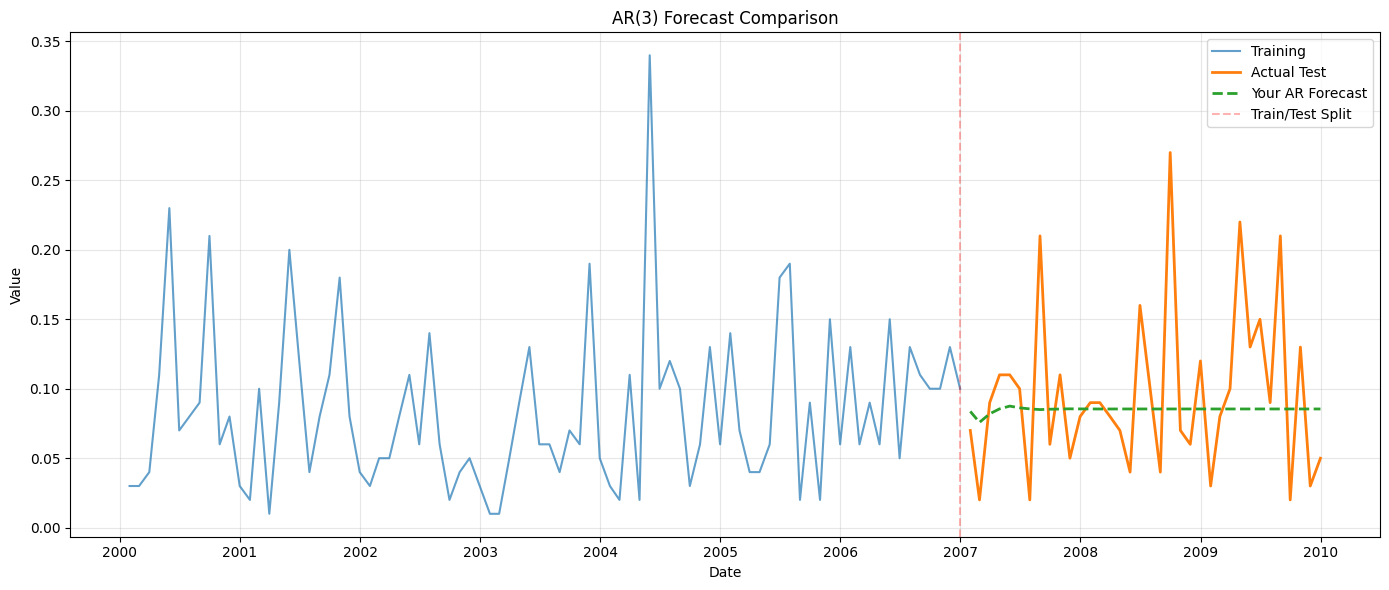

In [24]:

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Split data
train_size = len(data) - 36  # Hold out last 3 years
train = data[:train_size]
test = data[train_size:]

# Fit with your implementation
p = 3  # Start with AR(3)
manual_coef = fit_ar_manual(train.values, p)
manual_forecast = forecast_ar_manual(train.values, manual_coef, len(test))

# Compare with statsmodels ARIMA
arima_model = ARIMA(train, order=(p, 0, 0))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(test))



# Validation
print("\n" + "="*60)
print("VALIDATION: Your Implementation vs. ARIMA")
print("="*60)
print(f"\nCoefficients comparison:")
print(f"Your implementation: {manual_coef}")
# Align ARIMA params with manual_coef (drop extra params like sigma2)
arima_params = arima_fit.params.copy()
if arima_params.shape[0] > manual_coef.shape[0]:
    arima_params = arima_params.iloc[:manual_coef.shape[0]]
    # overwrite arima_fit.params so subsequent references match shapes
    arima_fit.params = arima_params

print(f"ARIMA implementation: {arima_params.values}")
print(f"Maximum difference: {np.abs(manual_coef - arima_fit.params.values).max():.6f}")
print(f"  (Should be < 0.001 if correct)")

print(f"\nForecast comparison:")
print(f"Your RMSE:  {np.sqrt(mean_squared_error(test, manual_forecast)):.4f}")
print(f"ARIMA RMSE: {np.sqrt(mean_squared_error(test, arima_forecast)):.4f}")
print(f"Maximum forecast difference: {np.abs(manual_forecast - arima_forecast).max():.6f}")
print(f"  (Should be < 0.0001 if correct)")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train.values, label='Training', alpha=0.7)
plt.plot(test.index, test.values, label='Actual Test', linewidth=2)
plt.plot(test.index, manual_forecast, '--', label='Your AR Forecast', linewidth=2)
# Add monthly seasonal component (from training data) to the plot


plt.axvline(train.index[-1], color='red', linestyle='--', alpha=0.3, label='Train/Test Split')
plt.legend()
plt.title(f'AR({p}) Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Group checkpoint**:
- [ ] Coefficients match within 0.001? some do
- [ ] Forecasts match within 0.0001? yes
- [ ] Everyone understands the code? :3
- [ ] Can you explain why the forecasts diverge as you predict further out? tune in next time

### Task 3.2: Model Selection with AIC and BIC

#### Understanding Information Criteria

The Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC), also known as the Schwarz Criterion, are fundamental tools for selecting among competing time series models by balancing goodness-of-fit against model complexity. Both criteria are based on the principle that while adding more parameters (such as additional lags in an AR(p) model) will always improve fit to the training data, overly complex models capture noise rather than signal and perform poorly on new data. AIC, developed by Hirotugu Akaike in 1974, is calculated as ${\rm AIC} = -2 \log(L) + 2 k$, where $L$ is the maximized likelihood of the model and k is the number of parameters. This formula penalizes complexity linearly: each additional parameter adds exactly 2 to the AIC. BIC uses a stronger penalty: ${\rm BIC} = -2 \log(L) + k\log(n)$, where $n$ is the sample size. For typical sample sizes $(n > 8)$, $\log(n) > 2$, meaning BIC penalizes complexity more heavily than AIC. For both criteria, lower values indicate better models, as they represent a better balance between fit (captured by the likelihood term) and parsimony (captured by the penalty term). The fundamental difference between them reflects different philosophical goals: AIC is asymptotically optimal for prediction and tends to select models that minimize out-of-sample forecast error, while BIC is consistent—meaning it will select the true model with probability approaching one as sample size grows, if the true model is among the candidates.

In practical time series analysis, particularly when selecting lag order for AR(p) or ARIMA(p,d,q) models, these criteria serve as automated, objective alternatives to informal methods like examining PACF plots. A typical workflow involves fitting models with various lag orders (say, p = 0 to 12), computing AIC and BIC for each, and selecting the model that minimizes the chosen criterion. Researchers often find that BIC selects more parsimonious models (smaller p) than AIC due to its stronger penalty, which becomes increasingly pronounced with larger sample sizes. This difference matters: in small samples, BIC's heavy penalty might lead to underfitting, while AIC's lighter penalty might select models that generalize better. In large samples, BIC's consistency property becomes advantageous if we believe a "true" low-dimensional model exists. Neither criterion is universally superior—the choice depends on whether the goal is optimal prediction (favoring AIC) or model identification (favoring BIC). Importantly, both criteria should be used alongside other diagnostic tools: examining residual autocorrelation to ensure the model adequately captures temporal dependence, checking forecast performance on held-out test data to validate out-of-sample predictive ability, and considering domain knowledge about plausible lag structures. The key insight is that AIC and BIC quantify the bias-variance tradeoff: too few parameters (high bias, low variance) versus too many parameters (low bias, high variance), with their different penalty strengths reflecting different optimal points along this fundamental tradeoff in statistical learning.

/home/jabelieu/Desktop/cmse830_fds/.venv_fds/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


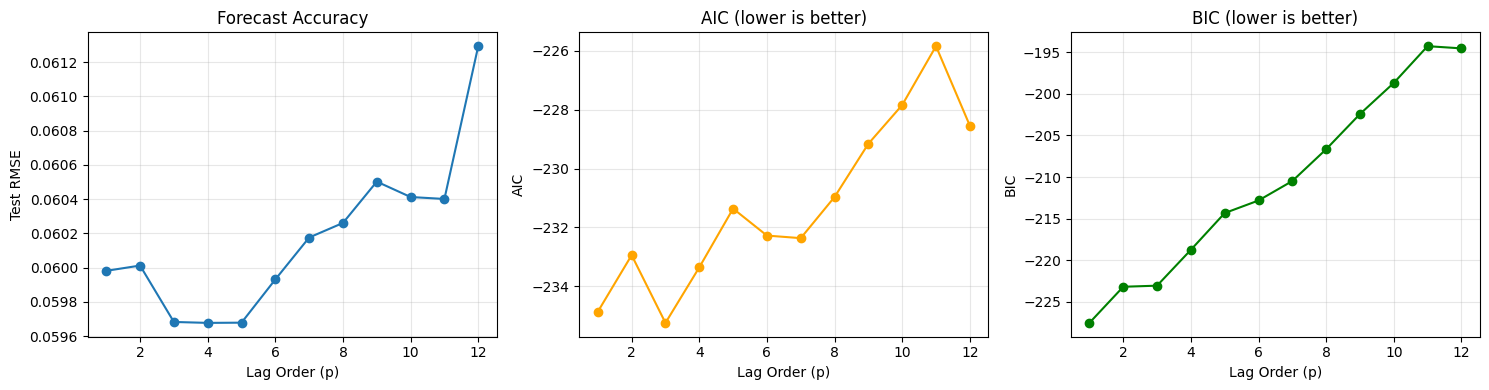


Optimal p by RMSE: 4
Optimal p by AIC:  3
Optimal p by BIC:  1


In [23]:
# Try different lag orders
p_values = range(1, 13)
results = []

for p in p_values:
    model = ARIMA(train, order=(p, 0, 0))
    fit = model.fit()
    forecast = fit.forecast(steps=len(test))
    rmse = np.sqrt(mean_squared_error(test, forecast))
    
    results.append({
        'p': p,
        'RMSE': rmse,
        'AIC': fit.aic,
        'BIC': fit.bic
    })

results_df = pd.DataFrame(results)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].plot(results_df['p'], results_df['RMSE'], 'o-')
axes[0].set_xlabel('Lag Order (p)')
axes[0].set_ylabel('Test RMSE')
axes[0].set_title('Forecast Accuracy')
axes[0].grid(True, alpha=0.3)

axes[1].plot(results_df['p'], results_df['AIC'], 'o-', color='orange')
axes[1].set_xlabel('Lag Order (p)')
axes[1].set_ylabel('AIC')
axes[1].set_title('AIC (lower is better)')
axes[1].grid(True, alpha=0.3)

axes[2].plot(results_df['p'], results_df['BIC'], 'o-', color='green')
axes[2].set_xlabel('Lag Order (p)')
axes[2].set_ylabel('BIC')
axes[2].set_title('BIC (lower is better)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nOptimal p by RMSE: {results_df.loc[results_df['RMSE'].idxmin(), 'p']:.0f}")
print(f"Optimal p by AIC:  {results_df.loc[results_df['AIC'].idxmin(), 'p']:.0f}")
print(f"Optimal p by BIC:  {results_df.loc[results_df['BIC'].idxmin(), 'p']:.0f}")



**Discussion**:
- Do RMSE, AIC, and BIC agree?
- Why might BIC prefer smaller p?
- What's the bias-variance tradeoff here?

---

## Part 4: VAR and Causality (20 minutes)

### Whiteboard Work: VAR Extension

#### Step 4.1: VAR(p) Framework (8 minutes)

Now you have **TWO** time series: temperature $T_t$ and precipitation $P_t$

**Write out on whiteboard**:

1. **Univariate models** (what you just did):
   - Temperature AR(2): $T_t = c_T + \phi_{T,1} T_{t-1} + \phi_{T,2} T_{t-2} + \epsilon_{T,t}$
   - Precipitation AR(2): $P_t = c_P + \phi_{P,1} P_{t-1} + \phi_{P,2} P_{t-2} + \epsilon_{P,t}$

2. **Bivariate VAR(2)** - each variable depends on lags of BOTH:
   ```
   T_t = c_T + φ_{TT,1}T_{t-1} + φ_{TT,2}T_{t-2} + φ_{TP,1}P_{t-1} + φ_{TP,2}P_{t-2} + ε_{T,t}
   P_t = c_P + φ_{PT,1}T_{t-1} + φ_{PT,2}T_{t-2} + φ_{PP,1}P_{t-1} + φ_{PP,2}P_{t-2} + ε_{P,t}
   ```

3. **Matrix form**: Write in vector notation:
   ```
   [T_t]   [c_T]   [φ_{TT,1}  φ_{TP,1}] [T_{t-1}]   [φ_{TT,2}  φ_{TP,2}] [T_{t-2}]   [ε_{T,t}]
   [P_t] = [c_P] + [φ_{PT,1}  φ_{PP,1}] [P_{t-1}] + [φ_{PT,2}  φ_{TP,2}] [P_{t-2}] + [ε_{P,t}]
   ```

**Count parameters**: For VAR(2) with K=2 variables, how many parameters total?
- Each equation: 1 constant + 2 lags × 2 variables = 5 parameters per equation
- Total: 2 equations × 5 = **10 parameters**

**General formula**: VAR(p) with K variables → $K + K^2 \cdot p$ parameters per equation × K equations

#### Step 4.2: Granger Causality Framework (12 minutes)

**Central question**: Does temperature Granger-cause precipitation?

**What this means**: Does past temperature help predict current precipitation, *beyond* what past precipitation alone can predict?

**Write out the test**:

1. **Restricted model** (precipitation equation from separate AR):
   ```
   P_t = c_P + φ_{PP,1}P_{t-1} + φ_{PP,2}P_{t-2} + ε_t
   ```
   - Only uses past precipitation
   - Get RSS₁ (residual sum of squares)

2. **Unrestricted model** (precipitation equation from VAR):
   ```
   P_t = c_P + φ_{PT,1}T_{t-1} + φ_{PT,2}T_{t-2} + φ_{PP,1}P_{t-1} + φ_{PP,2}P_{t-2} + ε_t
   ```
   - Includes past temperature
   - Get RSS₀ (should be ≤ RSS₁)

3. **Test statistic**:
   ```
   F = [(RSS₁ - RSS₀) / q] / [RSS₀ / (n - k)]
   ```
   where:
   - q = number of restrictions (2 in this case: φ_{PT,1} = φ_{PT,2} = 0)
   - n = number of observations
   - k = number of parameters in unrestricted model

4. **Hypotheses**:
   - H₀: Temperature does NOT Granger-cause precipitation (φ_{PT,1} = φ_{PT,2} = 0)
   - H₁: Temperature DOES Granger-cause precipitation (at least one φ_{PT,i} ≠ 0)

**Critical thinking questions** (discuss as group):

a) **Interpretation**:
   - If we reject H₀, does that mean temperature *causes* precipitation in a causal sense?
   - What's the difference between "Granger causality" and "true causality"?

b) **Bidirectional relationships**:
   - Can we also test if precipitation Granger-causes temperature?
   - Could both be true simultaneously? What would that mean?

c) **Physical plausibility**:
   - **Temperature → Precipitation**: Higher temps → more evaporation → more rain?
     - What lag makes sense? Immediate? 1 month? Seasonal?
   - **Precipitation → Temperature**: More rain → cloud cover → cooling?
     - What lag makes sense?

d) **Confounders**:
   - What third variables might drive both temperature and precipitation?
     - Season (strong confounder!)
     - El Niño / La Niña patterns
     - Geographic location
     - Climate change trends
   - How would these create *spurious* Granger causality?

e) **Practical considerations**:
   - Our data: Monthly, 2000-2009 (120 observations)
   - Is this enough data for reliable VAR estimation?
   - Should we seasonally adjust first? Detrend?
   - Are both series stationary? (Check your earlier tests!)

**📸 Take photo of whiteboard (Photo 2)**

---

## Part 5: Cross-Group Discussion (10 minutes)

**Pairing**: Even groups find an odd group

**Use monitors to show both groups' results side-by-side**

### Round 1: Share Your Findings (3 minutes each group)

Each group presents:
1. Your dataset (temperature or precipitation)
2. Stationarity test results
3. Best AR(p) model and performance
4. Key patterns observed (seasonality, trend, etc.)

### Round 2: Joint Analysis (4 minutes together)

**Compare the two series**:

1. **Visual comparison**: Place plots side-by-side
   - Do they have similar seasonal patterns?
   - Do they move together or opposite?
   - Which is more predictable?

2. **Statistical comparison**:
   - Are both stationary or both non-stationary?
   - Do both need similar AR order?
   - Similar forecast accuracy?

3. **VAR feasibility**:
   - Would VAR(p) make sense for these series?
   - What would be gained vs. separate AR models?
   - What challenges might arise?

### Round 3: Causality Discussion (3 minutes together)

**Hypothesize and design tests**:

1. **Does temperature Granger-cause precipitation?**
   - What's the physical mechanism?
   - What lag structure makes sense?
   - How would you test this? (Be specific: what models, what null hypothesis?)

2. **Does precipitation Granger-cause temperature?**
   - What's the physical mechanism?
   - What lag structure makes sense?
   - How would you test this?

3. **Confounders**:
   - What factors drive both series?
   - How could you control for seasonality?
   - What additional data would strengthen causal claims?

4. **Practical implications**:
   - For weather forecasting, which relationship is more useful?
   - For agriculture/water management, what would you want to predict?
   - What ethical considerations arise in weather/climate prediction?

---

## Part 6: ARIMA Extension (5 minutes)

### Quick Implementation

Based on your stationarity results, fit an appropriate ARIMA model:



In [ ]:
# If your series was non-stationary, use d=1
# If seasonal patterns are strong, consider seasonal ARIMA

# Determine d based on stationarity tests
d = 0 if results['recommendation'] == 'stationary' else 1

# Try a few ARIMA specifications
arima_specs = [
    (1, d, 0),  # AR(1) with differencing
    (2, d, 0),  # AR(2) with differencing  
    (3, d, 0),  # AR(3) with differencing
    (1, d, 1),  # ARMA(1,1) with differencing
    (2, d, 1),  # ARMA(2,1) with differencing
]

arima_results = []
for order in arima_specs:
    model = ARIMA(train, order=order)
    fit = model.fit()
    forecast = fit.forecast(steps=len(test))
    rmse = np.sqrt(mean_squared_error(test, forecast))
    
    arima_results.append({
        'order': order,
        'RMSE': rmse,
        'AIC': fit.aic,
        'BIC': fit.bic
    })
    
arima_df = pd.DataFrame(arima_results)
print("\nARIMA Model Comparison:")
print(arima_df.to_string(index=False))

best_idx = arima_df['BIC'].idxmin()
best_order = arima_df.loc[best_idx, 'order']
print(f"\nBest model by BIC: ARIMA{best_order}")

# Fit best model
best_model = ARIMA(train, order=best_order)
best_fit = best_model.fit()
best_forecast = best_fit.forecast(steps=len(test))

# Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train.values, label='Training', alpha=0.7)
plt.plot(test.index, test.values, label='Actual', linewidth=2)
plt.plot(test.index, best_forecast, '--', label=f'ARIMA{best_order}', linewidth=2)
plt.axvline(train.index[-1], color='red', linestyle='--', alpha=0.3)
plt.legend()
plt.title(f'Best ARIMA Model: {best_order}')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**Discussion**:
- How does ARIMA(p,d,q) compare to just AR(p)?
- Did adding the MA component (q > 0) help?
- Was differencing necessary based on your tests?

---

## Deliverables Checklist

Before submitting, ensure you have:

- [ ] **Photo 1**: Whiteboard work showing AR(p) derivation with design matrix
- [ ] **Photo 2**: Whiteboard work showing VAR framework and Granger causality test
- [ ] **Code**: Complete, commented implementation of `fit_ar_manual()` and `forecast_ar_manual()`
- [ ] **Validation**: Comparison showing your implementation matches statsmodels
- [ ] **Stationarity tests**: Results for both ADF and KPSS with interpretation
- [ ] **Model selection**: Analysis comparing different AR orders
- [ ] **ARIMA exploration**: Comparison of ARIMA specifications
- [ ] **Plots**: All required visualizations (time series, ACF/PACF, forecasts, model selection)
- [ ] **Cross-group discussion notes**: Key insights from paired discussion
- [ ] **Written synthesis**: Individual reflection addressing all 6 sections

---

## Part 7: Written Synthesis (Complete at home for your own learning)

### Individual Reflection

In a markdown cell, write a structured summary (300-500 words):

**Include these sections**:

#### 1. Dataset & Stationarity (2-3 sentences)
- Which dataset did you analyze?
- Was it stationary? What did ADF and KPSS tests show?
- Did you need differencing?

#### 2. AR Model Implementation (3-4 sentences)
- What was challenging about implementing AR(p) manually?
- How did your implementation compare to statsmodels?
- What did this teach you about the connection between regression and time series?

#### 3. Model Selection (2-3 sentences)
- What AR order performed best?
- Did PACF, AIC, BIC, and RMSE agree?
- What's the tradeoff in choosing p?

#### 4. Comparison with Other Dataset (3-4 sentences)
- How did temperature and precipitation patterns differ?
- Which was more predictable?
- Would VAR modeling make sense? Why or why not?

#### 5. Causality Insights (4-5 sentences)
- What causal hypotheses seem plausible between temperature and precipitation?
- How would you test for Granger causality?
- What does "Granger causality" really mean vs. true causality?
- What confounders need to be considered?
- What additional data would strengthen causal inference?

#### 6. Broader Implications (2-3 sentences)
- How might these models be used in practice?
- What are limitations of this analysis?
- What ethical considerations arise in weather/climate forecasting?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

# Data
temperature_data = [
    [20.6, 29.8, 41.0, 44.2, 59.2, 66.1, 66.7, 68.2, 60.1, 53.0, 37.7, 15.6], # 2000
    [24.7, 26.5, 31.9, 48.9, 59.2, 66.3, 69.7, 70.8, 58.7, 49.9, 46.4, 34.2], # 2001
    [30.7, 29.7, 31.5, 47.2, 51.8, 68.6, 73.2, 69.3, 64.6, 46.4, 36.4, 26.8], # 2002
    [17.6, 19.9, 32.3, 45.3, 53.8, 63.5, 69.0, 69.7, 60.8, 48.2, 41.2, 30.7], # 2003
    [16.5, 23.3, 38.8, 48.2, 58.2, 65.0, 68.9, 65.1, 64.7, 51.3, 40.4, 28.2], # 2004
    [21.8, 28.2, 30.8, 50.2, 54.7, 72.7, 72.8, 72.8, 66.8, 52.6, 41.8, 25.6], # 2005
    [33.2, 25.4, 35.7, 50.3, 58.2, 66.6, 73.7, 69.8, 59.1, 46.4, 40.9, 34.8], # 2006
    [26.4, 17.2, 39.4, 44.6, 60.5, 68.9, 70.3, 71.4, 64.5, 56.4, 37.6, 27.2], # 2007
    [26.3, 21.5, 31.9, 50.2, 54.7, 68.1, 71.0, 69.0, 63.4, 48.4, 37.6, 25.5], # 2008
    [15.7, 26.9, 36.8, 46.7, 57.2, 66.0, 66.6, 68.2, 62.2, 47.6, 43.3, 27.3], # 2009
]

precipitation_data = [
    [0.03, 0.03, 0.04, 0.11, 0.23, 0.07, 0.08, 0.09, 0.21, 0.06, 0.08, 0.03], # 2000
    [0.02, 0.10, 0.01, 0.09, 0.20, 0.12, 0.04, 0.08, 0.11, 0.18, 0.08, 0.04], # 2001
    [0.03, 0.05, 0.05, 0.08, 0.11, 0.06, 0.14, 0.06, 0.02, 0.04, 0.05, 0.03], # 2002
    [0.01, 0.01, 0.05, 0.09, 0.13, 0.06, 0.06, 0.04, 0.07, 0.06, 0.19, 0.05], # 2003
    [0.03, 0.02, 0.11, 0.02, 0.34, 0.10, 0.12, 0.10, 0.03, 0.06, 0.13, 0.06], # 2004
    [0.14, 0.07, 0.04, 0.04, 0.06, 0.18, 0.19, 0.02, 0.09, 0.02, 0.15, 0.06], # 2005
    [0.13, 0.06, 0.09, 0.06, 0.15, 0.05, 0.13, 0.11, 0.10, 0.10, 0.13, 0.10], # 2006
    [0.07, 0.02, 0.09, 0.11, 0.11, 0.10, 0.02, 0.21, 0.06, 0.11, 0.05, 0.08], # 2007
    [0.09, 0.09, 0.08, 0.07, 0.04, 0.16, 0.10, 0.04, 0.27, 0.07, 0.06, 0.12], # 2008
    [0.03, 0.08, 0.10, 0.22, 0.13, 0.15, 0.09, 0.21, 0.02, 0.13, 0.03, 0.05], # 2009
]

# Convert to flat arrays
temperature = np.array(temperature_data).flatten()
precipitation = np.array(precipitation_data).flatten()

# Choose one dataset to work with (temperature or precipitation)
data = temperature  # Change to precipitation for odd groups CHEESE

dates = pd.date_range(start="2000-01", periods=len(data), freq="ME")
data = pd.Series(data, index=dates)  # Convert to Series for decomposition

# Split into training and test sets
train_size = len(temperature) - 36
train = data[:train_size]
test = data[train_size:]

# Plot original data with train/test split
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values, label="Training Data")
plt.plot(test.index, test.values, label="Test Data")
plt.legend()
plt.title("Temperature Time Series")
plt.show()

# STL Decomposition
decomposition = seasonal_decompose(train, period=12)
plt.figure(figsize=(12, 10))
decomposition.plot()
plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(train, lags=35, alpha=0.05, ax=ax1)
ax1.set_title('ACF')

plot_pacf(train, lags=35, alpha=0.05, ax=ax2)
ax2.set_title('PACF')

plt.tight_layout()
plt.show()

# Fit AR(p) model and forecast
p = 3  # Example order
model = ARIMA(train, order=(p, 0, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

# Evaluate
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse}")

# Plot forecasts
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values, label="Training Data")
plt.plot(test.index, test.values, label="Test Data")
plt.plot(test.index, forecast, label=f"AR({p}) Forecast", linestyle="--")
plt.legend()
plt.title("One-Step-Ahead Forecast")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Download cryptocurrency data (no API key needed!)
print("Downloading cryptocurrency data...")
print("This may take 30-60 seconds...\n")

btc = yf.download('BTC-USD', start='2018-01-01', progress=False)
eth = yf.download('ETH-USD', start='2018-01-01', progress=False)

# Calculate daily returns (percentage change)
btc_returns = btc['Close']['BTC-USD'].pct_change() * 100
eth_returns = eth['Close']['ETH-USD'].pct_change() * 100

# Combine into single DataFrame
crypto_data = pd.DataFrame({
    'BTC_Return': btc_returns,
    'ETH_Return': eth_returns
}).dropna()

print("Data loaded successfully!")
print(f"Shape: {crypto_data.shape}")
print(f"Date range: {crypto_data.index[0].date()} to {crypto_data.index[-1].date()}")
print(f"\nSummary statistics:")
print(crypto_data.describe())
print(f"\nCorrelation between BTC and ETH returns: {crypto_data.corr().iloc[0,1]:.4f}")

In [ ]:
# *** CHANGE THIS LINE BASED ON YOUR GROUP NUMBER ***
# Even groups: use 'BTC_Return'
# Odd groups: use 'ETH_Return'

your_series_name = 'BTC_Return'  # or 'ETH_Return'
data = crypto_data[your_series_name].copy()

print(f"\nYour group is analyzing: {your_series_name}")
print(f"Number of observations: {len(data)}")

# Create comprehensive visualization
fig, axes = plt.subplots(4, 1, figsize=(14, 12))

# 1. Returns over time
axes[0].plot(data.index, data.values, linewidth=0.5, alpha=0.7)
axes[0].axhline(0, color='red', linestyle='--', alpha=0.3)
axes[0].set_title(f'{your_series_name}: Daily Returns Over Time')
axes[0].set_ylabel('Return (%)')
axes[0].grid(True, alpha=0.3)

# Add major events (optional - adjust dates based on your data)
# 2020 COVID crash
if '2020-03' in str(data.index[0]):
    axes[0].axvspan('2020-03-01', '2020-03-31', alpha=0.2, color='red', label='COVID Crash')

# 2. Distribution of returns
axes[1].hist(data.values, bins=100, alpha=0.7, edgecolor='black')
axes[1].axvline(0, color='red', linestyle='--', alpha=0.5)
axes[1].set_title('Distribution of Returns')
axes[1].set_xlabel('Return (%)')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

# 3. ACF
plot_acf(data, lags=40, ax=axes[2], alpha=0.05)
axes[2].set_title('Autocorrelation Function (ACF)')
axes[2].set_xlabel('Lag (days)')

# 4. PACF
plot_pacf(data, lags=40, ax=axes[3], alpha=0.05)
axes[3].set_title('Partial Autocorrelation Function (PACF)')
axes[3].set_xlabel('Lag (days)')

plt.tight_layout()
plt.show()

In [ ]:
# Compare price levels vs. returns
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Bitcoin price level
axes[0, 0].plot(btc.index, btc['Close'])
axes[0, 0].set_title('Bitcoin Price (USD)')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].grid(True, alpha=0.3)

# Bitcoin returns
axes[0, 1].plot(crypto_data.index, crypto_data['BTC_Return'], linewidth=0.5)
axes[0, 1].axhline(0, color='red', linestyle='--', alpha=0.3)
axes[0, 1].set_title('Bitcoin Returns (%)')
axes[0, 1].set_ylabel('Return (%)')
axes[0, 1].grid(True, alpha=0.3)

# Ethereum price level
axes[1, 0].plot(eth.index, eth['Close'])
axes[1, 0].set_title('Ethereum Price (USD)')
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].grid(True, alpha=0.3)

# Ethereum returns
axes[1, 1].plot(crypto_data.index, crypto_data['ETH_Return'], linewidth=0.5)
axes[1, 1].axhline(0, color='red', linestyle='--', alpha=0.3)
axes[1, 1].set_title('Ethereum Returns (%)')
axes[1, 1].set_ylabel('Return (%)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
def comprehensive_stationarity_test(series, name='Series'):
    """
    Run ADF and KPSS tests with interpretation
    """
    print(f"\n{'='*70}")
    print(f"STATIONARITY TESTS FOR {name}")
    print(f"{'='*70}")
    
    # ADF Test (H0: unit root / non-stationary)
    adf_result = adfuller(series, autolag='AIC')
    print(f"\n1. ADF Test (H₀: Non-stationary, H₁: Stationary)")
    print(f"   Test Statistic: {adf_result[0]:.4f}")
    print(f"   p-value: {adf_result[1]:.4f}")
    print(f"   Lags used: {adf_result[2]}")
    print(f"   Critical values:")
    for key, value in adf_result[4].items():
        print(f"      {key}: {value:.4f}")
    
    if adf_result[1] < 0.05:
        adf_conclusion = "STATIONARY"
        print(f"   → Reject H₀ at 5% level: Evidence FOR stationarity ✓")
    else:
        adf_conclusion = "NON-STATIONARY"
        print(f"   → Fail to reject H₀: Evidence for unit root ✗")
    
    # KPSS Test (H0: stationary)
    kpss_result = kpss(series, regression='c', nlags='auto')
    print(f"\n2. KPSS Test (H₀: Stationary, H₁: Non-stationary)")
    print(f"   Test Statistic: {kpss_result[0]:.4f}")
    print(f"   p-value: {kpss_result[1]:.4f}")
    print(f"   Lags used: {kpss_result[2]}")
    print(f"   Critical values:")
    for key, value in kpss_result[3].items():
        print(f"      {key}: {value:.4f}")
    
    if kpss_result[1] > 0.05:
        kpss_conclusion = "STATIONARY"
        print(f"   → Fail to reject H₀ at 5% level: Evidence FOR stationarity ✓")
    else:
        kpss_conclusion = "NON-STATIONARY"
        print(f"   → Reject H₀: Evidence for non-stationarity ✗")
    
    # Combined interpretation
    print(f"\n{'='*70}")
    print("COMBINED INTERPRETATION")
    print(f"{'='*70}")
    
    if adf_conclusion == "STATIONARY" and kpss_conclusion == "STATIONARY":
        print("✓✓ STRONG EVIDENCE: Both tests agree series is STATIONARY")
        print("   → Can use AR(p) model without differencing")
        print("   → This is expected for financial returns!")
        recommendation = "stationary"
    elif adf_conclusion == "NON-STATIONARY" and kpss_conclusion == "NON-STATIONARY":
        print("✓✓ STRONG EVIDENCE: Both tests agree series is NON-STATIONARY")
        print("   → Need to difference the series")
        print("   → Use ARIMA(p,1,q) instead of AR(p)")
        recommendation = "non-stationary"
    else:
        print("⚠⚠ CONFLICTING RESULTS - Tests disagree")
        print("   Possible causes:")
        print("   - Structural breaks in the data")
        print("   - Near unit root (highly persistent but stationary)")
        print("   - Model misspecification")
        print("   → Investigate further, check for breaks")
        recommendation = "ambiguous"
    
    print(f"{'='*70}\n")
    
    return {
        'adf_statistic': adf_result[0],
        'adf_pvalue': adf_result[1],
        'adf_conclusion': adf_conclusion,
        'kpss_statistic': kpss_result[0],
        'kpss_pvalue': kpss_result[1],
        'kpss_conclusion': kpss_conclusion,
        'recommendation': recommendation
    }

# Test your series
results = comprehensive_stationarity_test(data, your_series_name)

In [ ]:
def fit_ar_manual(data, p):
    """
    Fit AR(p) model using ordinary least squares
    
    Parameters
    ----------
    data : array-like
        Time series data (1D array or Series)
    p : int
        Number of autoregressive lags
        
    Returns
    -------
    coefficients : ndarray
        Estimated coefficients [c, φ_1, φ_2, ..., φ_p]
        where c is the constant/intercept term
    """
    data = np.asarray(data).flatten()
    T = len(data)
    
    # Step 1: Create design matrix X (T-p rows, p+1 columns)
    X = np.ones((T - p, p + 1))  # Initialize with ones for constant
    
    # Fill in lagged values
    for i in range(p):
        X[:, i + 1] = data[p - 1 - i : T - 1 - i]
    
    # Step 2: Create response vector y (T-p rows)
    y = data[p:]
    
    # Step 3: Solve using OLS: β = (X'X)^(-1) X'y
    # Using lstsq is numerically more stable than computing inverse explicitly
    coefficients, _, _, _ = np.linalg.lstsq(X, y, rcond=None)
    
    return coefficients


def forecast_ar_manual(data, coefficients, steps):
    """
    Generate multi-step forecasts from fitted AR model
    
    Parameters
    ----------
    data : array-like
        Historical time series data
    coefficients : ndarray
        Model coefficients [c, φ_1, φ_2, ..., φ_p]
    steps : int
        Number of steps ahead to forecast
        
    Returns
    -------
    forecasts : ndarray
        Array of forecasted values
    """
    data = np.asarray(data).flatten()
    p = len(coefficients) - 1
    c = coefficients[0]
    phi = coefficients[1:]
    
    # Initialize history with last p observations
    history = list(data[-p:])
    
    forecasts = []
    for _ in range(steps):
        # One-step forecast: c + φ_1*y_{t-1} + φ_2*y_{t-2} + ... + φ_p*y_{t-p}
        yhat = c + sum(phi[i] * history[-(i + 1)] for i in range(p))
        forecasts.append(yhat)
        history.append(yhat)  # Add forecast to history for next iteration
    
    return np.array(forecasts)

In [ ]:
# Split data into train/test
# Hold out last 30 days for testing
train_size = len(data) - 30
train = data[:train_size]
test = data[train_size:]

print(f"Training size: {len(train)} days")
print(f"Test size: {len(test)} days")

# Fit with your implementation
p = 5  # Start with AR(5)
print(f"\nFitting AR({p}) model...")

manual_coef = fit_ar_manual(train.values, p)
manual_forecast = forecast_ar_manual(train.values, manual_coef, len(test))

# Compare with statsmodels ARIMA
arima_model = ARIMA(train, order=(p, 0, 0))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(test))

# Validation
print("\n" + "="*70)
print("VALIDATION: Your Implementation vs. Statsmodels ARIMA")
print("="*70)

print(f"\nCoefficients comparison:")
print(f"Your implementation:  {manual_coef}")
print(f"ARIMA implementation: {arima_fit.params.values}")
coef_diff = np.abs(manual_coef - arima_fit.params.values).max()
print(f"Maximum difference:   {coef_diff:.8f}")

if coef_diff < 0.001:
    print("✓ Coefficients match! (difference < 0.001)")
else:
    print("✗ Coefficients don't match - check your implementation")

print(f"\nForecast comparison:")
manual_rmse = np.sqrt(mean_squared_error(test, manual_forecast))
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
print(f"Your RMSE:   {manual_rmse:.4f}")
print(f"ARIMA RMSE:  {arima_rmse:.4f}")
forecast_diff = np.abs(manual_forecast - arima_forecast).max()
print(f"Maximum forecast difference: {forecast_diff:.8f}")

if forecast_diff < 0.0001:
    print("✓ Forecasts match! (difference < 0.0001)")
else:
    print("✗ Forecasts don't match - check your implementation")

print("="*70)

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Full series with train/test split
axes[0].plot(train.index, train.values, label='Training Data', alpha=0.7, linewidth=0.5)
axes[0].plot(test.index, test.values, label='Actual Test Data', linewidth=1.5, color='black')
axes[0].plot(test.index, manual_forecast, '--', label='Your AR Forecast', linewidth=2)
axes[0].plot(test.index, arima_forecast, ':', label='ARIMA Forecast', linewidth=2, alpha=0.7)
axes[0].axvline(train.index[-1], color='red', linestyle='--', alpha=0.5, label='Train/Test Split')
axes[0].axhline(0, color='gray', linestyle='-', alpha=0.3, linewidth=0.5)
axes[0].legend()
axes[0].set_title(f'AR({p}) Forecast: {your_series_name}')
axes[0].set_ylabel('Return (%)')
axes[0].grid(True, alpha=0.3)

# Zoom in on test period
axes[1].plot(test.index, test.values, 'o-', label='Actual', linewidth=2, markersize=4)
axes[1].plot(test.index, manual_forecast, 's--', label='Your Forecast', linewidth=2, markersize=4)
axes[1].plot(test.index, arima_forecast, '^:', label='ARIMA Forecast', linewidth=2, 
             markersize=4, alpha=0.7)
axes[1].axhline(0, color='gray', linestyle='-', alpha=0.3)
axes[1].legend()
axes[1].set_title('Test Period Detail')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Return (%)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Try different lag orders
p_values = range(1, 21)
results = []

print("Testing different AR orders...")
for p in p_values:
    try:
        model = ARIMA(train, order=(p, 0, 0))
        fit = model.fit()
        forecast = fit.forecast(steps=len(test))
        rmse = np.sqrt(mean_squared_error(test, forecast))
        
        results.append({
            'p': p,
            'RMSE': rmse,
            'AIC': fit.aic,
            'BIC': fit.bic
        })
    except:
        # Some large p values might fail
        pass

results_df = pd.DataFrame(results)
print("\nModel selection results:")
print(results_df)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

axes[0].plot(results_df['p'], results_df['RMSE'], 'o-', linewidth=2, markersize=6)
axes[0].set_xlabel('Lag Order (p)', fontsize=12)
axes[0].set_ylabel('Test RMSE', fontsize=12)
axes[0].set_title('Forecast Accuracy by Lag Order', fontsize=14)
axes[0].grid(True, alpha=0.3)
best_rmse_p = results_df.loc[results_df['RMSE'].idxmin(), 'p']
axes[0].axvline(best_rmse_p, color='red', linestyle='--', alpha=0.5, 
                label=f'Best: p={best_rmse_p:.0f}')
axes[0].legend()

axes[1].plot(results_df['p'], results_df['AIC'], 'o-', color='orange', linewidth=2, markersize=6)
axes[1].set_xlabel('Lag Order (p)', fontsize=12)
axes[1].set_ylabel('AIC', fontsize=12)
axes[1].set_title('AIC by Lag Order (lower is better)', fontsize=14)
axes[1].grid(True, alpha=0.3)
best_aic_p = results_df.loc[results_df['AIC'].idxmin(), 'p']
axes[1].axvline(best_aic_p, color='red', linestyle='--', alpha=0.5, 
                label=f'Best: p={best_aic_p:.0f}')
axes[1].legend()

axes[2].plot(results_df['p'], results_df['BIC'], 'o-', color='green', linewidth=2, markersize=6)
axes[2].set_xlabel('Lag Order (p)', fontsize=12)
axes[2].set_ylabel('BIC', fontsize=12)
axes[2].set_title('BIC by Lag Order (lower is better)', fontsize=14)
axes[2].grid(True, alpha=0.3)
best_bic_p = results_df.loc[results_df['BIC'].idxmin(), 'p']
axes[2].axvline(best_bic_p, color='red', linestyle='--', alpha=0.5, 
                label=f'Best: p={best_bic_p:.0f}')
axes[2].legend()

plt.tight_layout()
plt.show()

print(f"\nOptimal lag order by different criteria:")
print(f"  Test RMSE: p = {best_rmse_p:.0f}")
print(f"  AIC:       p = {best_aic_p:.0f}")
print(f"  BIC:       p = {best_bic_p:.0f}")